In [1]:
# Reading the first few lines of each uploaded file to understand the structure of the data.
file_paths = ['/home/mkato/hdd_data/data/1-withAADR/1-1-pca/jomon_aadr_asia.evec.txt.evec', '/home/mkato/hdd_data/data/1-withAADR/1-0-merged_eigen/asia_poplist.txt']

# Reading first few lines from PCA results file
with open(file_paths[0], 'r') as f:
    pca_preview = [f.readline().strip() for _ in range(5)]

# Reading first few lines from population list file
with open(file_paths[1], 'r') as f:
    poplist_preview = [f.readline().strip() for _ in range(5)]

pca_preview, poplist_preview

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading PCA results into a DataFrame
pca_df = pd.read_csv(file_paths[0], delim_whitespace=True, comment='#', header=None, names=['Sample', 'PC1', 'PC2', 'PC3', 'PC4', 'Population'])

# Reading population list into a list
with open(file_paths[1], 'r') as f:
    pop_list = [line.strip() for line in f.readlines()]

# Filtering PCA DataFrame based on population list
pca_filtered_df = pca_df[pca_df['Population'].isin(pop_list)]

# Consolidate populations based on given strings
consolidate_dict = {
    'China': 'China',
    'Korea': 'Korea',
    'Mongolia': 'Mongolia',
    'Nepal': 'Nepal',
    'Taiwan': 'Taiwan',
    'Thai': 'Thai',
    'DevilsCave': 'DevilsCave',
    'Vietnam': 'Vietnam',
    'Malaysia': 'Malaysia',
    'Laos': 'Laos',
    'Indonesia': 'Indonesia',
    'Nagabaka': 'Nagabaka',
    'JPT': 'JPT',
    'CHB': 'CHB',
    'KHV': 'KHV',
    'CDX': 'CDX',
    'CHS': 'CHS',
    'Sanganji': 'Sanganji',
    'Control': 'Control'
}

# Apply the consolidation
for key, value in consolidate_dict.items():
    pca_filtered_df.loc[pca_filtered_df['Population'].str.contains(key), 'Population'] = value

# For the 'Control' population, use sample names for coloring
control_samples = pca_filtered_df[pca_filtered_df['Population'] == 'Control']['Sample'].unique()
control_color_map = {sample: f'{sample.split(":")[0]}' for sample in control_samples}
pca_filtered_df.loc[pca_filtered_df['Population'] == 'Control', 'Population'] = pca_filtered_df['Sample'].map(control_color_map)

# Check the first few rows of the filtered and modified DataFrame
pca_filtered_df.head()


/tmp/ipykernel_59165/458957080.py:14: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/tmp/ipykernel_59165/458957080.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  pca_df = pd.read_csv(file_paths[0], delim_whitespace=True, comment='#', header=None, names=['Sample', 'PC1', 'PC2', 'PC3', 'PC4', 'Population'])


,Sample,PC1,PC2,PC3,PC4,Population
1,DO:DO,0.1309,-0.1495,-0.0184,-0.0261,DO
2,FM020:FM020,0.1510,-0.1724,-0.0226,-0.0343,FM020
3,Jomon:Jomon,0.1453,-0.1679,-0.0194,-0.0364,Jomon
4,T5:T5,0.1347,-0.1536,-0.0231,-0.0259,T5
5,Ne30_genotyping_noUDG,0.0086,0.0051,-0.0353,0.0015,China


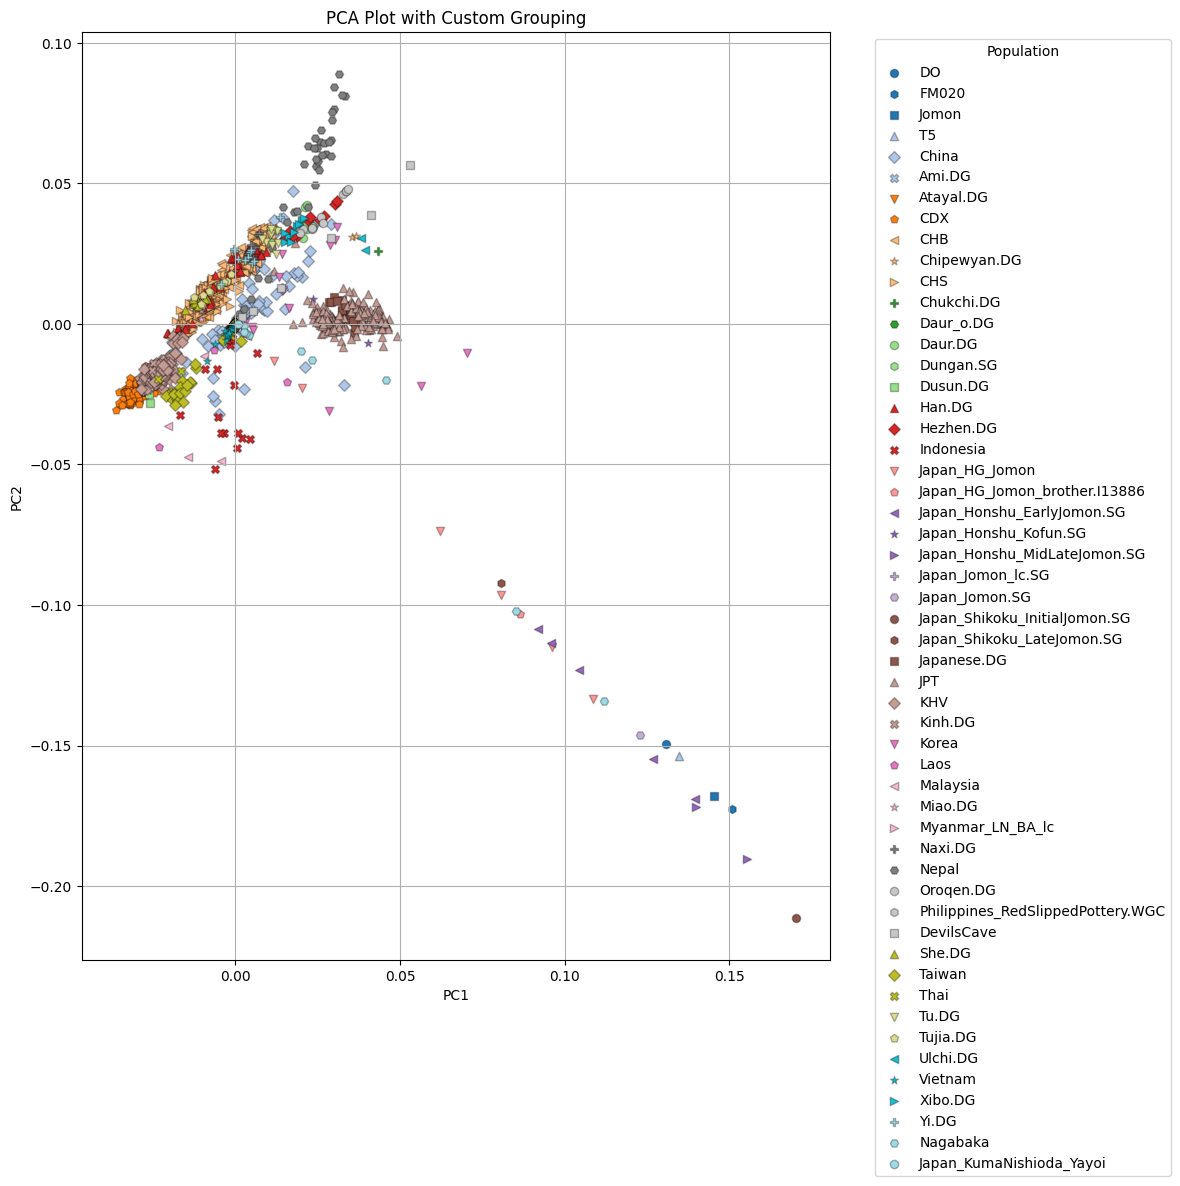

In [2]:
# Unique populations for setting colors and markers
unique_pops = pca_filtered_df['Population'].unique()

# Generate color map
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_pops)))
color_map = {pop: color for pop, color in zip(unique_pops, colors)}

# Marker styles
markers = ['o', 'h' ,'s','^', 'D', 'X','v','p', '<','*', '>', 'P', 'H',]
marker_map = {pop: marker for pop, marker in zip(unique_pops, markers * (len(unique_pops) // len(markers) + 1))}

# Plotting
plt.figure(figsize=(12, 12))

for pop in unique_pops:
    subset = pca_filtered_df[pca_filtered_df['Population'] == pop]
    plt.scatter(subset['PC1'], subset['PC2'],edgecolor=(0,0,0,0.3), c=[color_map[pop]], label=pop, marker=marker_map[pop])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Population', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('PCA Plot with Custom Grouping')
plt.grid(True)
plt.tight_layout()
plt.show()


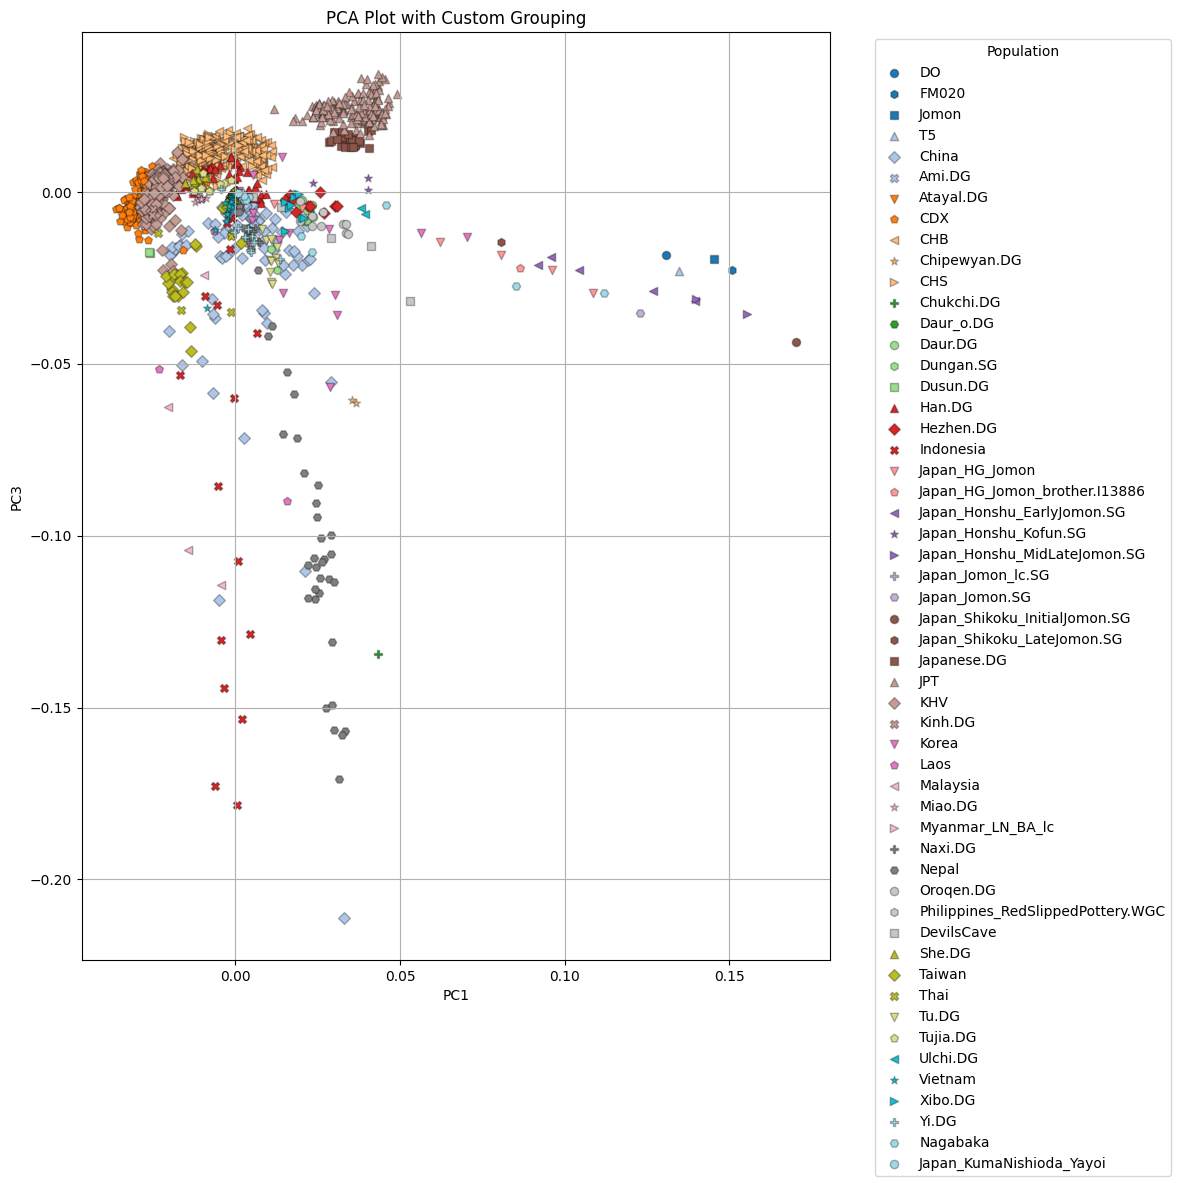

In [3]:
# Plotting
plt.figure(figsize=(12, 12))

for pop in unique_pops:
    subset = pca_filtered_df[pca_filtered_df['Population'] == pop]
    plt.scatter(subset['PC1'], subset['PC3'], edgecolor=(0,0,0,0.3),c=[color_map[pop]], label=pop, marker=marker_map[pop])

plt.xlabel('PC1')
plt.ylabel('PC3')
plt.legend(title='Population', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('PCA Plot with Custom Grouping')
plt.grid(True)
plt.tight_layout()
plt.show()


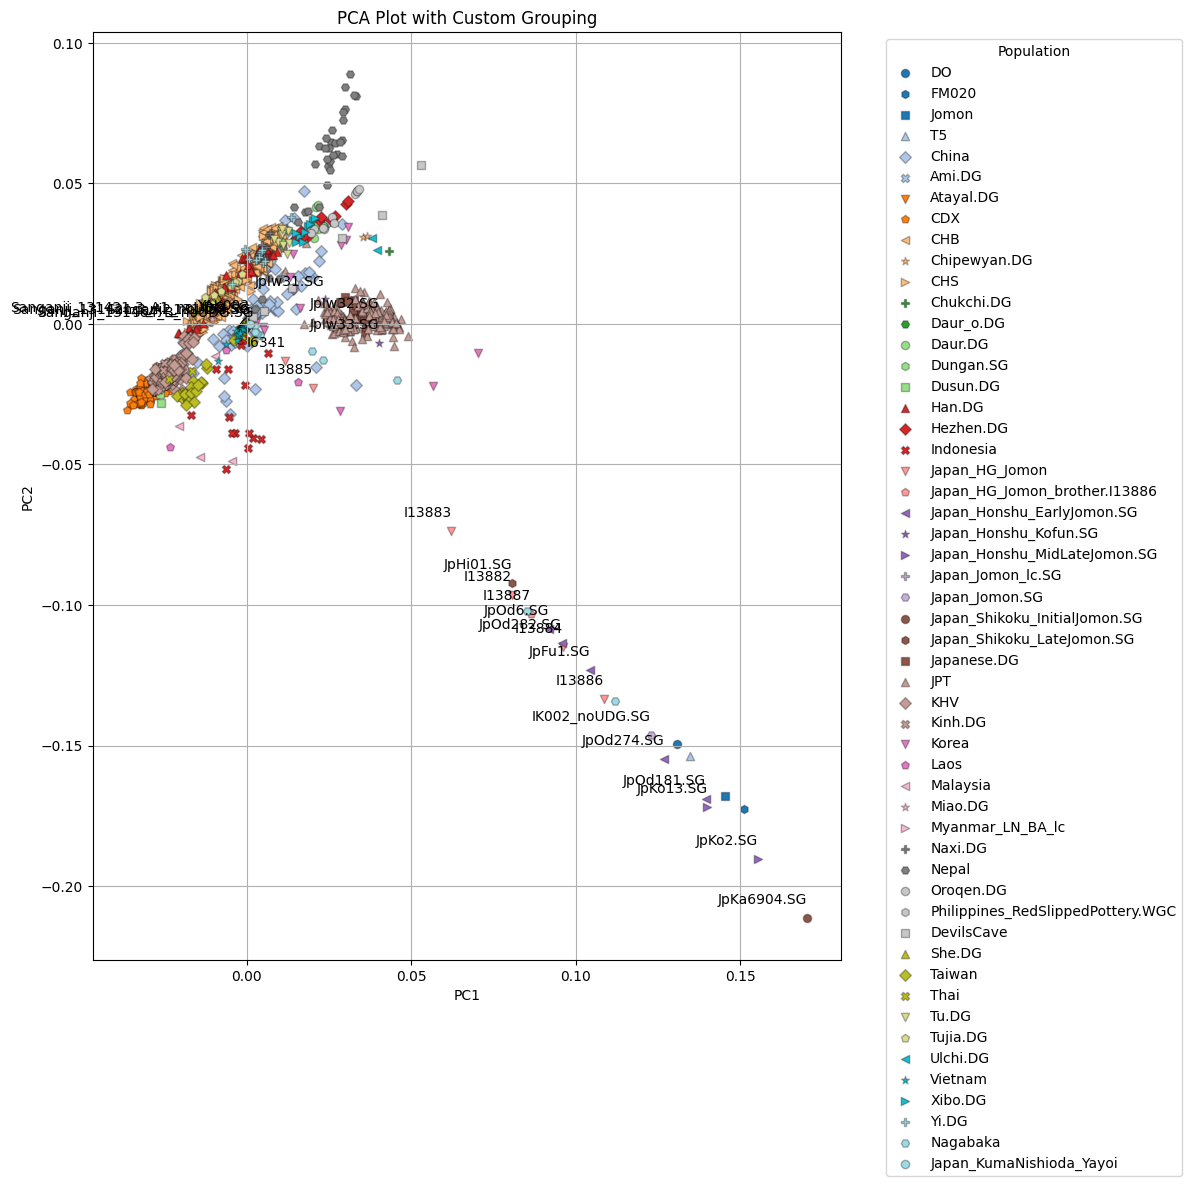

In [4]:
# Unique populations for setting colors and markers
unique_pops = pca_filtered_df['Population'].unique()

# Generate color map
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_pops)))
color_map = {pop: color for pop, color in zip(unique_pops, colors)}

# Marker styles
markers = ['o', 'h' ,'s','^', 'D', 'X','v','p', '<','*', '>', 'P', 'H',]
marker_map = {pop: marker for pop, marker in zip(unique_pops, markers * (len(unique_pops) // len(markers) + 1))}

# Plotting
plt.figure(figsize=(12, 12))

for pop in unique_pops:
    subset = pca_filtered_df[pca_filtered_df['Population'] == pop]
    plt.scatter(subset['PC1'], subset['PC2'],edgecolor=(0,0,0,0.3), c=[color_map[pop]], label=pop, marker=marker_map[pop])

    # Annotate sample names for populations starting with 'Japan_'
    if pop.startswith('Japan_'):
        for _, row in subset.iterrows():
            plt.annotate(row['Sample'], (row['PC1'], row['PC2']), textcoords="offset points", xytext=(0,10), ha='right')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Population', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('PCA Plot with Custom Grouping')
plt.grid(True)
plt.tight_layout()
plt.show()
